### 我们使用python的requests库来获得一些验证码训练材料，作为机器学习的训练数据。

👇`requests`库是python最流行的HTTP请求库，可以用来发送HTTP请求。

In [324]:
# !pip install requests    # 下载requests库
import requests
import time

👇下面`url`是学校登陆页面验证码的请求地址,
`UA`是浏览器的User-Agent，如果没有指定，则会使用默认UA。（一般默认的UA会被识别为爬虫）。

感兴趣的可以试一下删掉之后会发生什么。

In [325]:
url = "https://pass.hust.edu.cn/cas/code"
UA = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"

👇`headers`是请求头，作用是告诉服务器我们是什么类型的浏览器，以及我们请求的资源类型。

这些内容都可以利用浏览器自带的开发者工具查看，也可以在网上搜索相关资料。
<img src="./img/inspector.png" width="70%" height="auto"/>

In [326]:
headers = {
    "User-Agent":UA,
    # "Host": "pass.hust.edu.cn",
    # "Cookie":"XXXXXXXXXXXXXXXXX",
    # ...
}

👇下面是get请求,向服务器请求验证码图片，

`img.content`方法返回二进制形式内容

<img src="./img/inspector.png" width="50%" height="auto"/>

In [327]:
t = int(time.time()) # 获取当前时间戳，用于命名图片文件
img = requests.get(url, headers=headers)
with open('captcha.gif', 'wb') as f:
    f.write(img.content)
img.content

b'GIF89aZ\x00:\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x03\x03\x03\x04\x04\x04\x05\x05\x05\x06\x06\x06\x07\x07\x07\x08\x08\x08\t\t\t\n\n\n\x0b\x0b\x0b\x0c\x0c\x0c\r\r\r\x0e\x0e\x0e\x0f\x0f\x0f\x10\x10\x10\x11\x11\x11\x12\x12\x12\x13\x13\x13\x14\x14\x14\x15\x15\x15\x16\x16\x16\x17\x17\x17\x18\x18\x18\x19\x19\x19\x1a\x1a\x1a\x1b\x1b\x1b\x1c\x1c\x1c\x1d\x1d\x1d\x1e\x1e\x1e\x1f\x1f\x1f   !!!"""###$$$%%%&&&\'\'\'((()))***+++,,,---...///000111222333444555666777888999:::;;;<<<===>>>???@@@AAABBBCCCDDDEEEFFFGGGHHHIIIJJJKKKLLLMMMNNNOOOPPPQQQRRRSSSTTTUUUVVVWWWXXXYYYZZZ[[[\\\\\\]]]^^^___```aaabbbcccdddeeefffggghhhiiijjjkkklllmmmnnnooopppqqqrrrssstttuuuwswzrz|p}~o\x7f\x80m\x81\x82k\x83\x84j\x85\x85h\x86\x86g\x88\x87e\x89\x88d\x8a\x89b\x8b\x8aa\x8c\x8b`\x8d\x8b^\x8e\x8c]\x8e\x8c\\\x8f\x8c[\x8f\x8dZ\x8f\x8dZ\x90\x8dY\x90\x8dX\x90\x8dX\x90\x8dX\x90\x8eX\x90\x8eX\x90\x8eX\x90\x8eY\x91\x8eZ\x91\x8e[\x91\x8e\\\x91\x8fc\x95\x8fk\x99\x8fr\x9c\x90x\xa0\x90\x83\xa6\x90\x8b\xab\x90\x92\xb0\x90\x98

👇`PIL`全名：Python Imaging Library，是一个用于处理图像的库。其中：

    Image：用于处理图像的基本操作，如裁剪、缩放、旋转、滤波、转换等。
    ImageSequence：用于处理多帧图像，如gif、视频等。
    ImageChops：用于对图像进行像素级别的操作，如加减、变换、合并等。

`io`库：用于处理输入输出，包括文件读写、网络传输、图像处理等。

In [328]:
from PIL import Image, ImageSequence, ImageChops
import io

👇使用io.BytesIO()将图片数据转换为`文件`对象，再使用Image.open()打开图片文件，即可得到图片对象。

In [329]:
gif = io.BytesIO(img.content)
tmp = Image.open(gif)

In [330]:
tmp.show()#显示图片

👇为了更方便的显示图片，我们使用matplotlib库来显示图片。

将Image类转换为numpy数组，并使用imshow()函数显示出来。

In [331]:
from matplotlib import pyplot as plt
import numpy as np

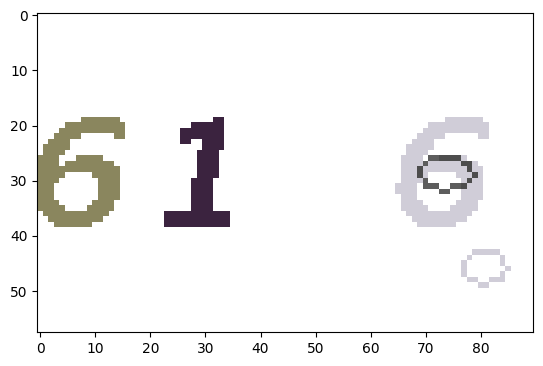

In [332]:
image_array = np.array(tmp)
plt.imshow(image_array)
plt.show()

👆可以看到这里只显示了gif的一帧
![image.gif](./captcha.gif)

👇下面我们将不同的帧的像素合并。
同时，去掉背景中的噪声。

怎么去呢？
```通过观察我们发现，噪声在每一帧都会变化，但数字部分闪烁速度较慢，所以对于像素值在时间上的平均值，噪声部分要低于数字部分。利用这一点我们可以去掉噪声。```

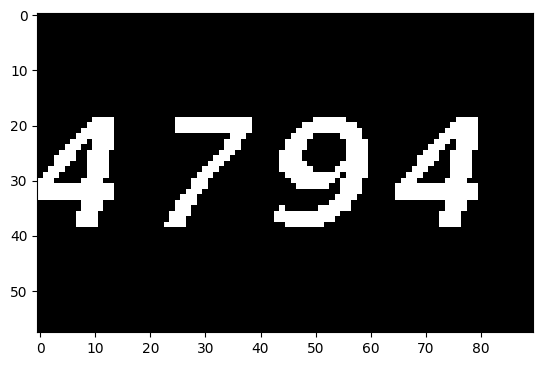

In [341]:
arr1 = np.zeros((58,90))
for frame in ImageSequence.Iterator(tmp):
    arr2 = np.array(frame.convert('L'))
    # print(arr2.shape)
    arr1 += arr2  
arr1 = arr1//4

arr1 = (arr1<200)*255 #阈值化
merged_image = Image.fromarray(arr1) #从numpy数组转换回图片
plt.imshow(merged_image)
plt.show()

👇最后一步，对每个数字进行裁剪并保存

In [334]:
merged_image = merged_image.convert('L')
merged_image.crop(( 0, 18, 16, 40)).save(f'./split/1-{t}.png')
merged_image.crop((22, 18, 38, 40)).save(f'./split/2-{t}.png')
merged_image.crop((44, 18, 60, 40)).save(f'./split/3-{t}.png')
merged_image.crop((66, 18, 82, 40)).save(f'./split/4-{t}.png')

# ·整合并循环

In [1]:
import requests
import time
from PIL import Image, ImageSequence, ImageChops
import io
from matplotlib import pyplot as plt
import numpy as np


url = "https://pass.hust.edu.cn/cas/code"
UA = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"

headers = {
    "User-Agent":UA,
}

# 循环请求验证码图片，并保存为4张小图片
num = 16
for i in range(num):
    t = int(time.time()) # 获取当前时间戳，用于命名图片文件
    img = requests.get(url, headers=headers)

    gif = io.BytesIO(img.content)
    tmp = Image.open(gif)

    arr1 = np.zeros((58,90))
    for frame in ImageSequence.Iterator(tmp):
        arr2 = np.array(frame.convert('L'))
        # print(arr2.shape)
        arr1 += arr2  
    arr1 = arr1//4

    arr1 = (arr1<210)*255 #阈值化
    merged_image = Image.fromarray(arr1) #从numpy数组转换回图片

    merged_image = merged_image.convert('L')
    merged_image.crop(( 0, 16, 16, 40)).save(f'./split/1-{t}.png')
    merged_image.crop((22, 16, 38, 40)).save(f'./split/2-{t}.png')
    merged_image.crop((44, 16, 60, 40)).save(f'./split/3-{t}.png')
    merged_image.crop((66, 16, 82, 40)).save(f'./split/4-{t}.png')
    print(f"第{i+1}/{num}次请求验证码成功")
    time.sleep(1) # 等待1秒，防止请求过快以致服务器拒绝

第1/16次请求验证码成功
第2/16次请求验证码成功
第3/16次请求验证码成功
第4/16次请求验证码成功
第5/16次请求验证码成功
第6/16次请求验证码成功
第7/16次请求验证码成功
第8/16次请求验证码成功
第9/16次请求验证码成功
第10/16次请求验证码成功
第11/16次请求验证码成功
第12/16次请求验证码成功
第13/16次请求验证码成功
第14/16次请求验证码成功
第15/16次请求验证码成功
第16/16次请求验证码成功
